In [43]:
import pandas as pd
from collections import Counter
from functools import reduce
import math
import numpy as np

K=20,
L=6 (Dajbov),
X=1,
Y=11.


## 1.Úloha : Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů včetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Pravděpodobnosti budeme odhadovat tak, že spočítáme relativné četnosti každého znaků v textu.

První souboru (001.txt)

In [118]:
with open('001.txt') as f:
    prvni_soubor = f.read()

Podíváme se na vstupní text a nevalidní znaky odfilrujeme

In [125]:
import string

valid_chars = set(string.ascii_lowercase + ' ')
filtered_text_first_file = [char for char in prvni_soubor if char in valid_chars]

Podíváme se, jestli jsme něco odfiltorvali a jaký znaky máme ve vyfiltrovaném textu.


In [225]:
all_words_first_file = sum(Counter(filtered_text_first_file).values())
print(f"amount of words in NOT filtered file: {len(prvni_soubor)}")
print(f"amount of filtered words {all_words_first_file}")
Counter(filtered_text_first_file).keys()

amount of words in NOT filtered file: 6501
amount of filtered words 6491


dict_keys(['i', 'e', 'r', 'o', 't', ' ', 'g', 'f', 'l', 'u', 'm', 'b', 'y', 'a', 'h', 'c', 'd', 'n', 'p', 's', 'w', 'v', 'k', 'q', 'j', 'x', 'z'])

Spočítáme pro každý znak jeho relativní četnost v prvním souboru

In [196]:
def count_probabilities(filtered_text):
    counts = Counter(filtered_text)
    total = sum(counts.values())
    res =  {
        ch: counts.get(ch, 0) / total if total > 0 else 0.0
        for ch in valid_chars
    }
    res = dict(sorted(res.items()))
    return res
probabilites_first_file = count_probabilities(filtered_text_first_file)
probabilites_first_file

{' ': 0.18579571714681867,
 'a': 0.06763210599291326,
 'b': 0.014943768294561701,
 'c': 0.015714065629332922,
 'd': 0.04668001848713604,
 'e': 0.102141426590664,
 'f': 0.02126020643968572,
 'g': 0.02203050377445694,
 'h': 0.051918040363580345,
 'i': 0.04606378061931906,
 'j': 0.002310892004313665,
 'k': 0.008011092281620705,
 'l': 0.038668926205515326,
 'm': 0.01694654136496688,
 'n': 0.05469111076875674,
 'o': 0.06193190571560622,
 'p': 0.014019411492836234,
 'q': 0.0009243568017254661,
 'r': 0.054537051301802496,
 's': 0.0448313048836851,
 't': 0.06747804652595903,
 'u': 0.024649514712679094,
 'v': 0.00462178400862733,
 'w': 0.018024957633646588,
 'x': 0.00015405946695424435,
 'y': 0.01309505469111077,
 'z': 0.0009243568017254661}

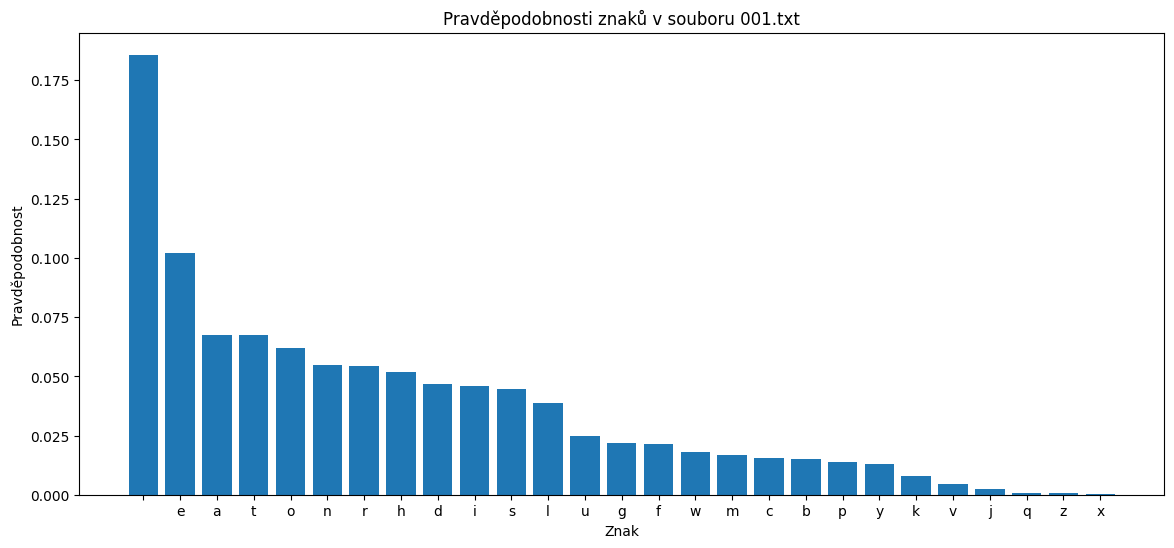

In [227]:
import matplotlib.pyplot as plt

sorted_probs1 = dict(sorted(probabilites_first_file.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(sorted_probs1.keys(), sorted_probs1.values())
plt.title('Pravděpodobnosti znaků v souboru 001.txt')
plt.xlabel('Znak')
plt.ylabel('Pravděpodobnost')
plt.show()


Druhý soubor (011.txt): S tímto souborem provedeme stejné operace jako v případě předchozího souboru (001.txt).

In [198]:
with open('011.txt') as f_2:
    druhy_soubor = f_2.read()
filtered_text_second_file = [char for char in druhy_soubor if char in valid_chars]
all_words_second_file = sum(Counter(filtered_text_second_file).values())
print(f"amount of words in NOT filtered file: {len(druhy_soubor)}")
print(f"amount of filtered words {all_words_second_file}")

amount of words in NOT filtered file: 6193
amount of filtered words 6180


In [199]:
probabilites_second_file = count_probabilities(filtered_text_second_file)
probabilites_second_file

{' ': 0.20533980582524272,
 'a': 0.05889967637540453,
 'b': 0.012944983818770227,
 'c': 0.015048543689320388,
 'd': 0.039158576051779935,
 'e': 0.0889967637540453,
 'f': 0.01650485436893204,
 'g': 0.013915857605177993,
 'h': 0.05275080906148867,
 'i': 0.04886731391585761,
 'j': 0.001941747572815534,
 'k': 0.010194174757281554,
 'l': 0.03203883495145631,
 'm': 0.025080906148867314,
 'n': 0.05145631067961165,
 'o': 0.07168284789644012,
 'p': 0.013268608414239482,
 'q': 0.0004854368932038835,
 'r': 0.04255663430420712,
 's': 0.048705501618122975,
 't': 0.07686084142394822,
 'u': 0.02540453074433657,
 'v': 0.0069579288025889965,
 'w': 0.019579288025889968,
 'x': 0.0008090614886731392,
 'y': 0.020388349514563107,
 'z': 0.00016181229773462783}

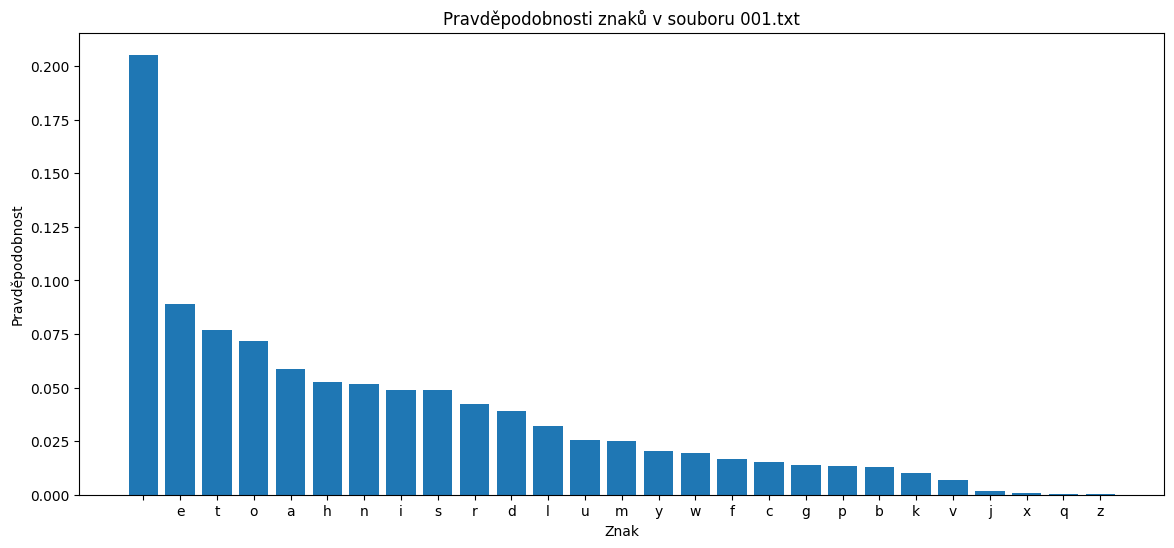

In [226]:
sorted_probs2 = dict(sorted(probabilites_second_file.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(sorted_probs2.keys(), sorted_probs2.values())
plt.title('Pravděpodobnosti znaků v souboru 001.txt')
plt.xlabel('Znak')
plt.ylabel('Pravděpodobnost')
plt.show()

## 2.Úloha :  Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.

Spočítáme entropii odhadnutého rozdělení znaků pro první text

In [228]:
def calc_entropy(text, all_words, probabilites):
    return -sum(p * math.log2(p) for p in probabilites.values() if p > 0)

In [229]:
print(f"entropie prvniho souboru : {calc_entropy(filtered_text_first_file, all_words_first_file, probabilites_first_file)}")

entropie prvniho souboru : 4.094726820189831


Spočítáme entropii odhadnutého rozdělení znaků pro druhý text


In [212]:
print(f"entropie druhého souboru : {calc_entropy(filtered_text_second_file, all_words_second_file, probabilites_second_file)}")

entropie druhého souboru : 4.065189735893128


## 3. Úloha : Nalezněte optimální binární instantní kód C pro kódování znaků prvního z textů. Řádně vysvětlete, proč je vámi nalezený kód optimální!

K nalezení optimálního binárního instatního kódu použijeme Huffmanův kód. Při odhadnutých pravděpodobnostech použitých výše se jedná o optimální kód, protože platí následující věta z přednášky ($\textbf{ Věta 6.17.} \textit{ Huffmanův kód je optimální.} $ Tj. je-li $C^*$ Huffmanův kód a $C'$ libovolný jednoznačně dekódovatelný kód, potom $L(C^*) \leq L(C')$.).\
 A platí, že instantní kód je i jednoznačně dekódovatelný, a tedy dostáváme, že Huffmanův kód je optimální pro instantní kódy. Tady pro úplnost dodejme, že máme binární abecedu, a tedy pokud budeme Huffmanovo kodování v binární abecedě, dostaneme optimální kód.\
  Samotná konstrukce Huffmanovo kodování proběhne tak, jak je popsáno v přednášce.


In [202]:
import heapq
from collections import namedtuple

class Node(namedtuple("Node", ["left", "right"])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")

class Leaf(namedtuple("Leaf", ["char"])):
    def walk(self, code, acc):
        code[self.char] = acc or "0"  # fallback if only one symbol

def huffman_code_from_probs(probabilities):
    heap = []

    for char, prob in probabilities.items():
        heap.append((prob, len(heap), Leaf(char)))  # (probability, tie-breaker, node)

    heapq.heapify(heap)
    count = len(heap)

    while len(heap) > 1:
        p1, _c1, left = heapq.heappop(heap)
        p2, _c2, right = heapq.heappop(heap)
        heapq.heappush(heap, (p1 + p2, count, Node(left, right)))
        count += 1

    code = {}
    if heap:
        [_p, _c, root] = heap[0]
        root.walk(code, "")
    return code


In [234]:
huffman_code_first_file = huffman_code_from_probs(probabilites_first_file)

Podíváme se, jak proběhlo kodování

In [235]:
for char, code in huffman_code_first_file.items():
    print(f"char: {char}, code : {code}")


char: i, code : 0000
char: g, code : 00010
char: u, code : 00011
char: d, code : 0010
char: h, code : 0011
char: e, code : 010
char: r, code : 0110
char: n, code : 0111
char: y, code : 100000
char: p, code : 100001
char: b, code : 100010
char: c, code : 100011
char: o, code : 1001
char: t, code : 1010
char: a, code : 1011
char: m, code : 110000
char: k, code : 1100010
char: z, code : 1100011000
char: x, code : 11000110010
char: q, code : 11000110011
char: j, code : 110001101
char: v, code : 11000111
char: l, code : 11001
char: w, code : 110100
char: f, code : 110101
char: s, code : 11011
char:  , code : 111


## 4. Úloha : Pro každý text zvlášť spočtěte střední délku kódu $C$  a porovnejte ji s entropií rozdělení znaků. Je kód $C$ optimální i pro druhý text? Řádně zdůvodněte!

Huffmanův kód $C$, který je optimální pro první text, nemusí být nutně optimální i pro jiný text, protože rozdělení $p_1(x)$ pro první text se může lišit od toho druhého $p_2(x)$. V našem případě my odhadujeme pravděpodobnosti každého znaku pomocí relativní četnosti každého znaku. A pokud nejsou dva texty identické, dostaneme rozdělení, které se liší pro nějaký znak $b \in \mathcal{X}$, $\mathcal{X}$ je anglická abeceda spolu s mezerou. V prvním textu má znak $b$ jednu relativní četnost a v druhém textu jinou relativní četnost. My jsme ale pro znak $b$ v rámci Huffmanovo kodování se při přizaní kodového slova opírali o jednu odhadnutou pravděpodnost, ale ve druhém textu je jiná. Pro pravděpobodnější znaky dostávájí znaky kratší kodová slova a pro měné pravděpodobné délší kodová slova. A proto kód $C$ není pro druhý text optimální.

Podíváme se na rozdělení prvního a druhého souboru. Pokud jsou stejný, pak i kód $C$ je i optimální i pro druhý text

In [208]:
differences = [
    abs(a - b) for a, b in zip(
        list(probabilites_first_file.values()),
        list(probabilites_second_file.values())
    )
]
differences

[0.019544088678424054,
 0.008732429617508732,
 0.001998784475791474,
 0.0006655219400125336,
 0.007521442435356102,
 0.013144662836618692,
 0.004755352070753678,
 0.008114646169278946,
 0.000832768697908326,
 0.0028035332965385476,
 0.00036914443149813113,
 0.0021830824756608486,
 0.0066300912540590146,
 0.008134364783900436,
 0.00323480008914509,
 0.009750942180833902,
 0.0007508030785967519,
 0.0004389199085215826,
 0.011980416997595375,
 0.003874196734437875,
 0.009382794897989197,
 0.000755016031657476,
 0.0023361447939616664,
 0.0015543303922433797,
 0.0006550020217188948,
 0.007293294823452338,
 0.0007625445039908382]

Spočítame střední délku pro kod $C$, $\sum_{x \in \mathcal{X}} \ell(x)p_1(x)$, pro soubour 001.txt, kde $\mathcal{X}$ je anglická abeceda spolu s mezerou a $\ell(x)$ značí délku kódového slova příslušejícího prvku $x \in \mathcal{X}$ a $p_1(x)$ je odhadnuté rozdělení pro soubour 001.txt

In [230]:
average_length_first_file = sum([len(code) * probabilites_first_file[char] for char, code in huffman_code_first_file.items()])
average_length_first_file

4.137421044523186

Tady spočítáme pro jistotu, jestli nalezený optimální kod splňuje nutnou podmínku, že jeho střední délka se může vzdálit od odhadnuté entropie nanejvýš o 1.


In [232]:
average_length_first_file - calc_entropy(filtered_text_first_file, all_words_first_file, probabilites_first_file)

0.04269422433335457

Spočítame střední délku pro kod $C$,
$\sum_{x \in \mathcal{X}} \ell(x)p_2(x)$, pro soubour 011.txt, kde $\mathcal{X}$ je anglická abeceda spolu s mezerou, $\ell(x)$ značí délku kódového slova příslušejícího prvku $x \in \mathcal{X}$ a $p_2(x)$ je odhadnuté rozdělení pro soubour 011.txt

In [217]:
average_length_second_file = sum([len(code) * probabilites_second_file[char] for char, code in huffman_code_first_file.items()])
average_length_second_file

4.149514563106796

In [236]:
average_length_second_file - calc_entropy(filtered_text_second_file, all_words_second_file, probabilites_second_file)

0.08432482721366785

Je vidět, že kód $C$ splňuje nutnou podmínky optimality pro dva zvolené texty, tj Pro otimální binární instantní kód $C^*$ diskrétní náhodné veličiny $X$ platí $H_D(X) \leq L(C^*) < H_D(X) + 1$. Ale pro druhý text není optimální z důvodu popsaných výše.